In [1]:
!pip install pandas matplotlib seaborn numpy

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [3]:
wine = pd.read_csv('winequalityN.csv')

In [4]:
# Check first five wines
wine.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [5]:
pred_test = wine.iloc[3]

In [6]:
pred_test['type'] = 1
pred_test.drop(['quality', 'total sulfur dioxide'],inplace=True)
#pred_test.drop('total_sulfur_dioxide',inplace=True)
pred_test

type                        1
fixed acidity             7.2
volatile acidity         0.23
citric acid              0.32
residual sugar            8.5
chlorides               0.058
free sulfur dioxide      47.0
density                0.9956
pH                       3.19
sulphates                 0.4
alcohol                   9.9
Name: 3, dtype: object

In [7]:
# rows and columns
wine.shape

(6497, 13)

In [15]:
# Checking null in each column
wine.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6488.000000  6493.000000  6497.000000  6497.000000  
mean      3.218395     0.531215    10.491801     5.818378  
std       0.160748     0.148814     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [14]:
# One to remove na values is just by dropping them since they are very few
wine.dropna(inplace=True)
#another way is to impute let's say average value 
#wine.update(wine.fillna(wine.mean()))

In [16]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 706.9+ KB


In [17]:
# Wine counts between red and white, alternatively run value_counts(normalize=True) for percentage
wine['type'].value_counts()

type
white    4870
red      1593
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='count'>

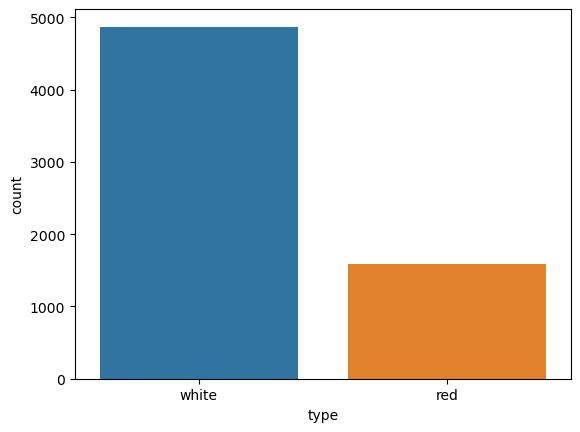

In [18]:
# Alternatively you can visualize the data as a graph using seaborn.
sns.countplot(x="type",data=wine)

In [19]:
wine['type'].value_counts(normalize=True)

type
white    0.75352
red      0.24648
Name: proportion, dtype: float64

<Axes: >

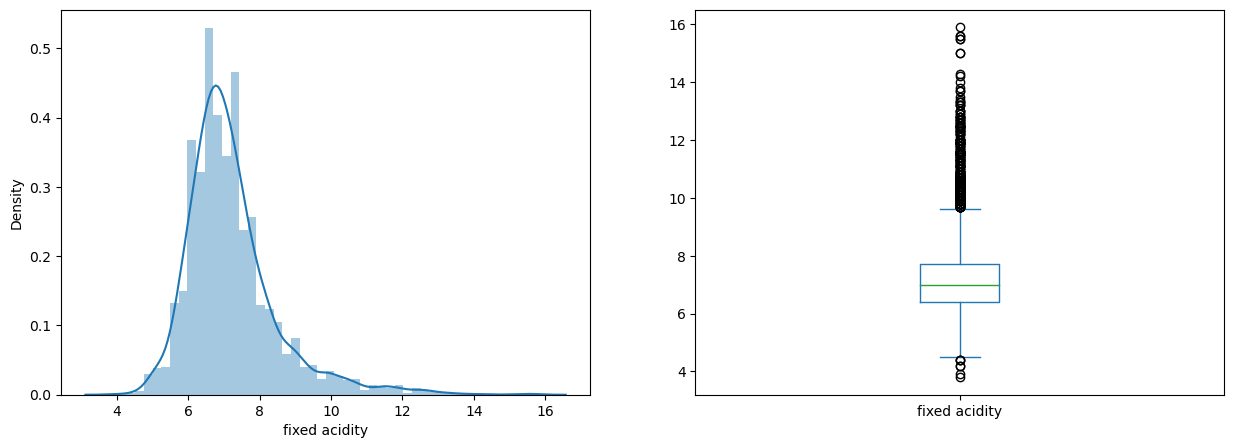

In [20]:
# Checking distribution and outlier for each variable
plt.figure(2)
plt.subplot(121)
sns.distplot(wine['fixed acidity'])
plt.subplot(122)
wine['fixed acidity'].plot.box(figsize=(15,5))

<Axes: >

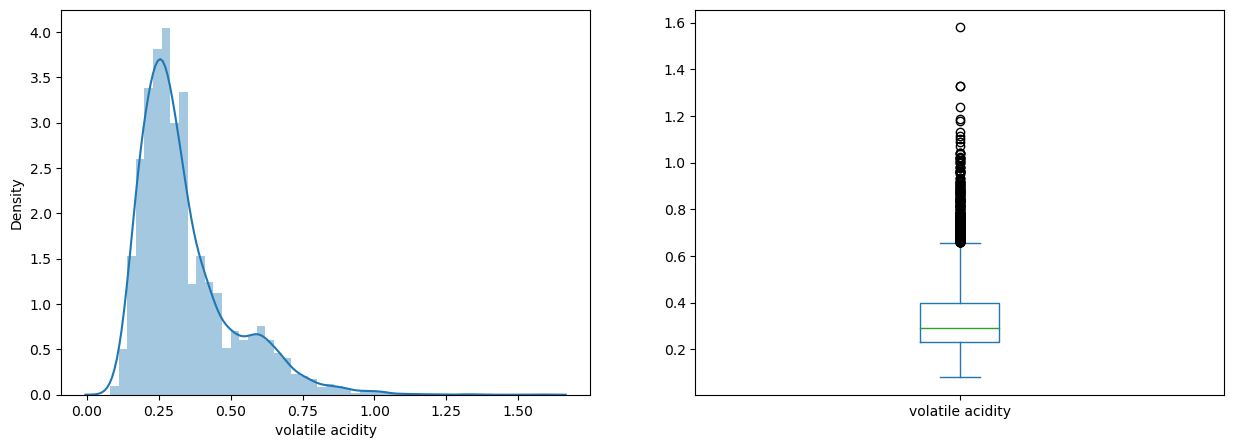

In [21]:
plt.figure(2)
plt.subplot(121)
sns.distplot(wine['volatile acidity'])
plt.subplot(122)
wine['volatile acidity'].plot.box(figsize=(15,5))

<Axes: >

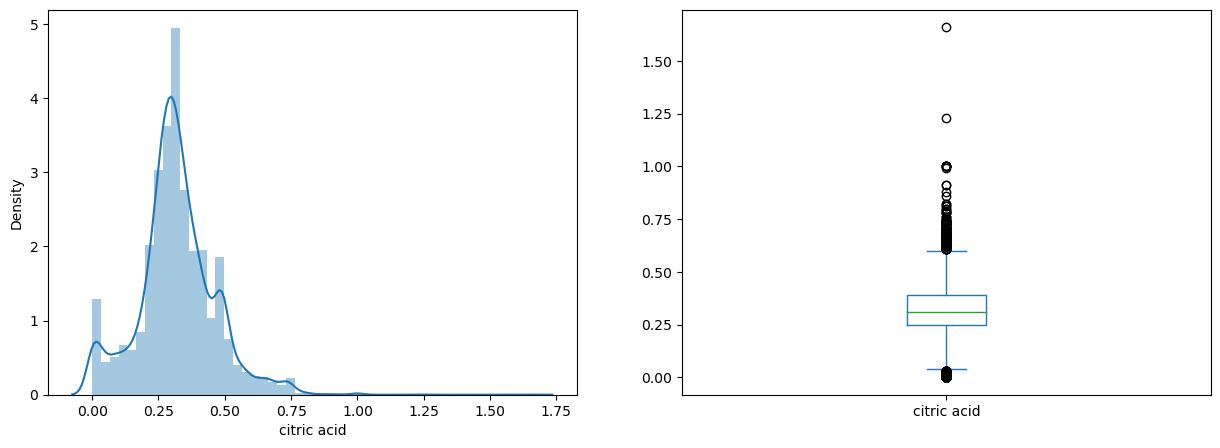

In [22]:
plt.figure(2)
plt.subplot(121)
sns.distplot(wine['citric acid'])
plt.subplot(122)
wine['citric acid'].plot.box(figsize=(15,5))

<Axes: >

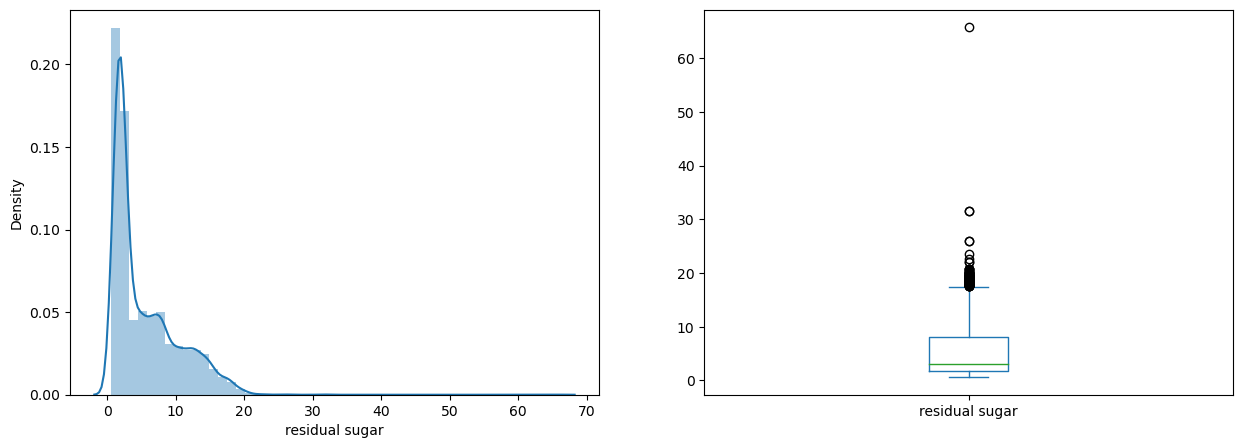

In [23]:
plt.figure(2)
plt.subplot(121)
sns.distplot(wine['residual sugar'])
plt.subplot(122)
wine['residual sugar'].plot.box(figsize=(15,5))

<Axes: >

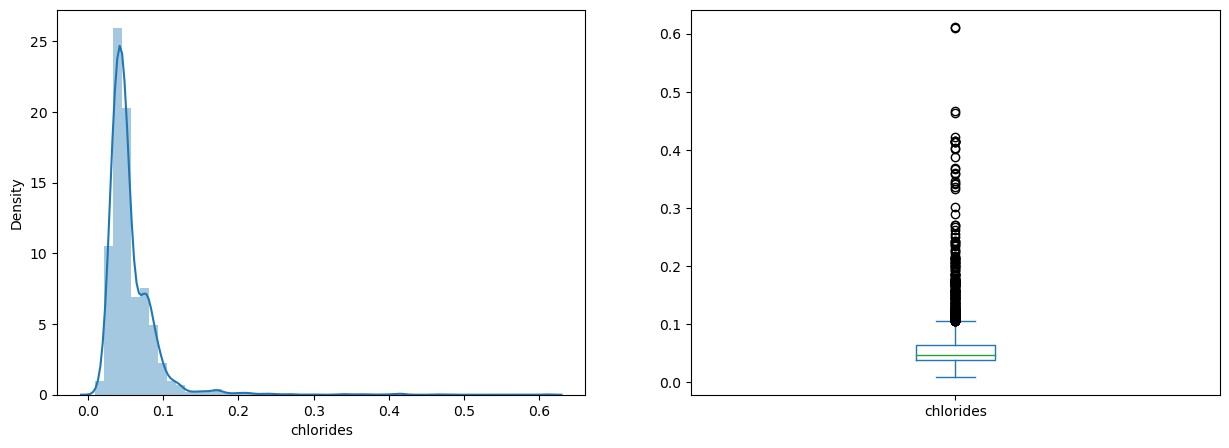

In [24]:
plt.figure(2)
plt.subplot(121)
sns.distplot(wine['chlorides'])
plt.subplot(122)
wine['chlorides'].plot.box(figsize=(15,5))

<Axes: >

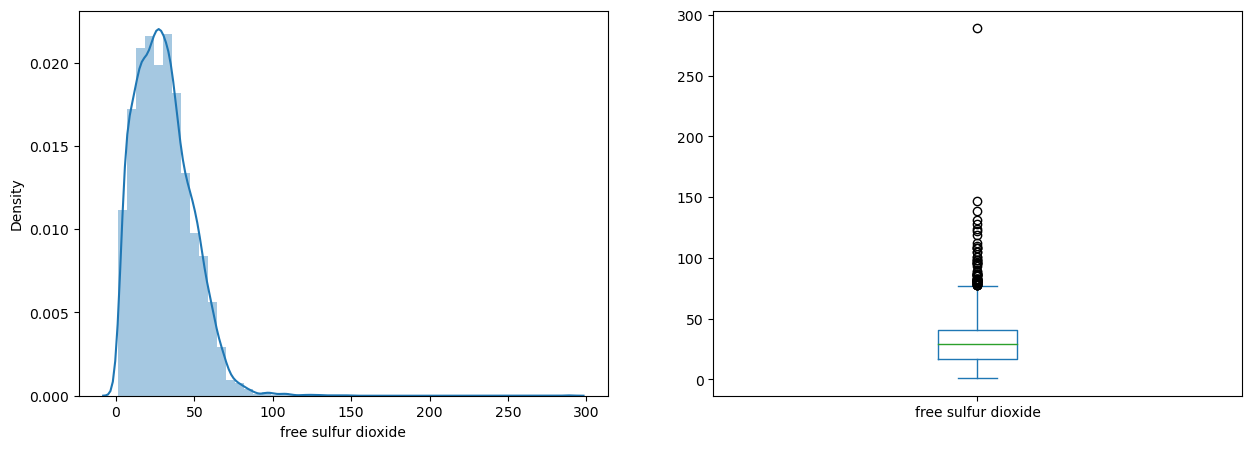

In [25]:
plt.figure(2)
plt.subplot(121)
sns.distplot(wine['free sulfur dioxide'])
plt.subplot(122)
wine['free sulfur dioxide'].plot.box(figsize=(15,5))

<Axes: >

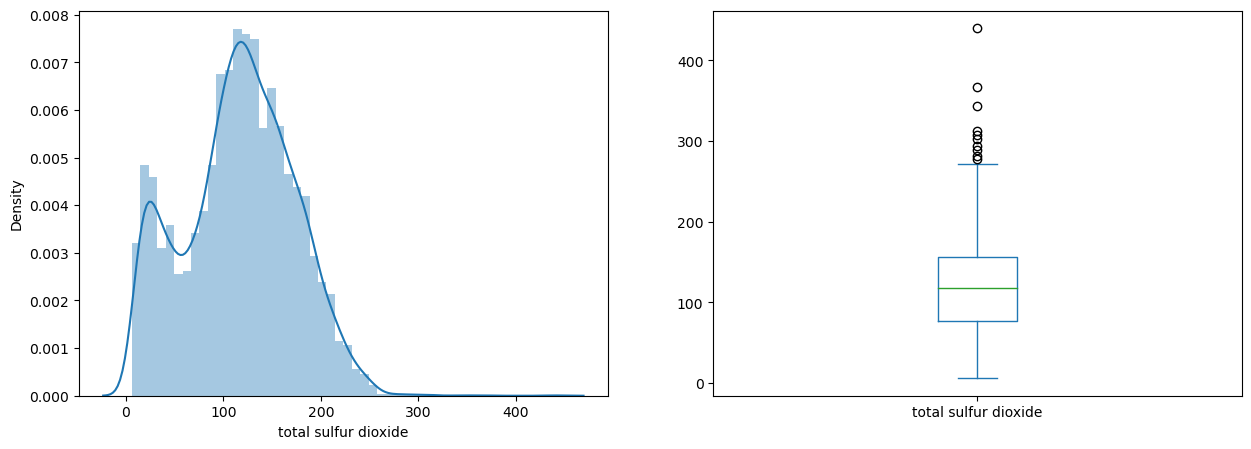

In [26]:
plt.figure(2)
plt.subplot(121)
sns.distplot(wine['total sulfur dioxide'])
plt.subplot(122)
wine['total sulfur dioxide'].plot.box(figsize=(15,5))

<Axes: >

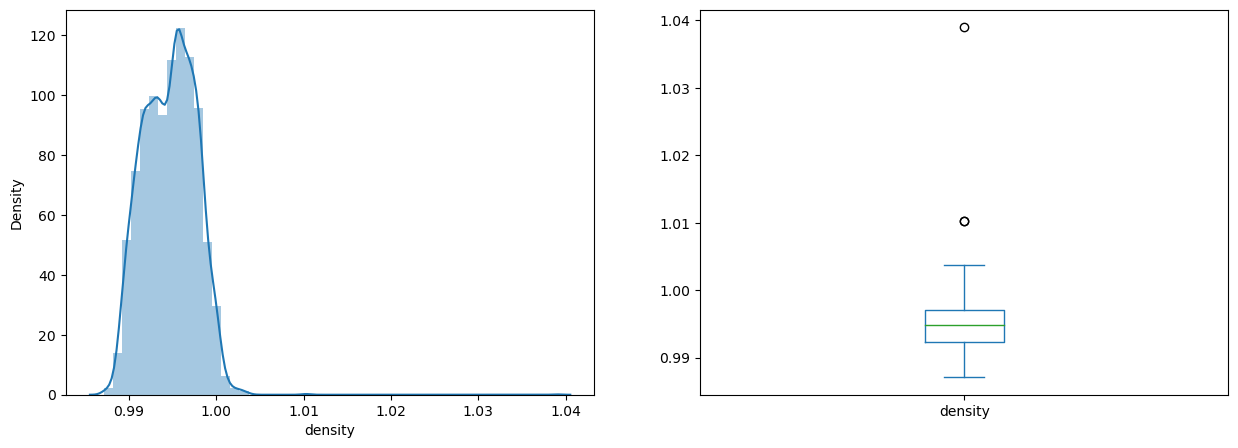

In [27]:
plt.figure(2)
plt.subplot(121)
sns.distplot(wine['density'])
plt.subplot(122)
wine['density'].plot.box(figsize=(15,5))

<Axes: >

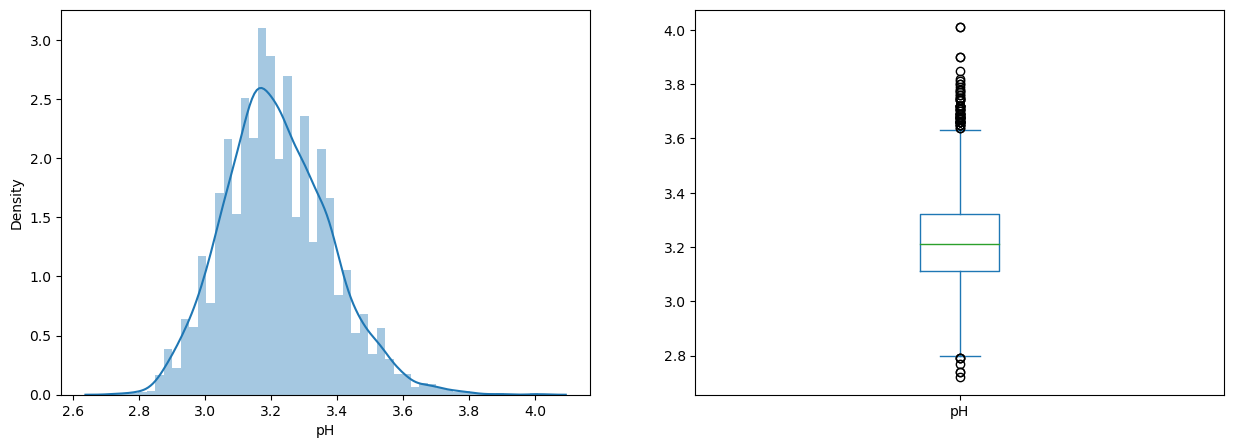

In [28]:
plt.figure(2)
plt.subplot(121)
sns.distplot(wine['pH'])
plt.subplot(122)
wine['pH'].plot.box(figsize=(15,5))

<Axes: >

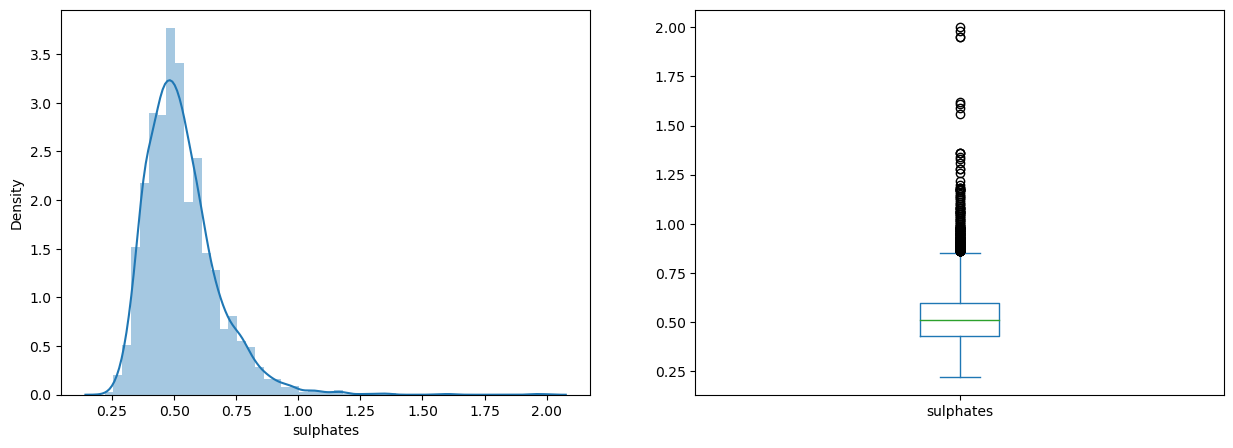

In [29]:
plt.figure(2)
plt.subplot(121)
sns.distplot(wine['sulphates'])
plt.subplot(122)
wine['sulphates'].plot.box(figsize=(15,5))

<Axes: >

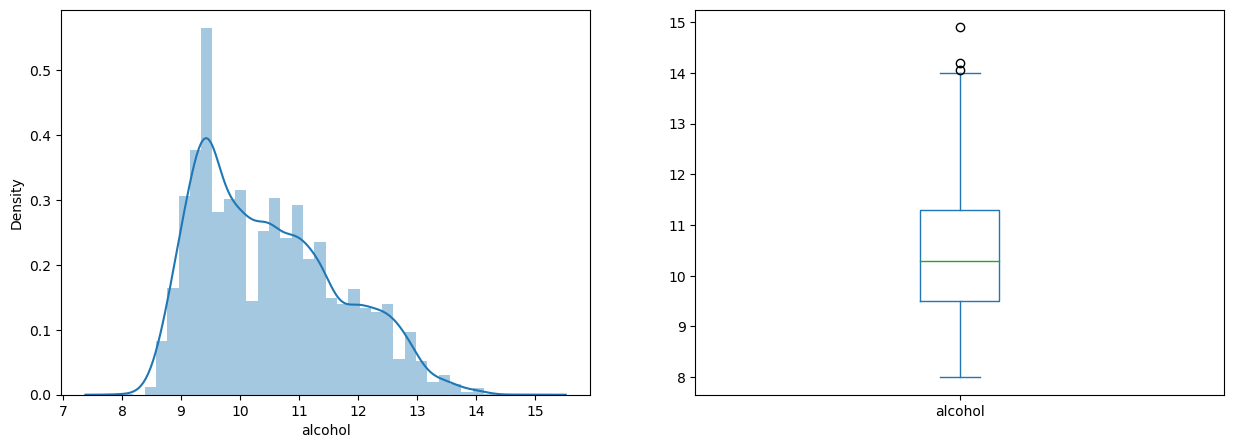

In [30]:
plt.figure(2)
plt.subplot(121)
sns.distplot(wine['alcohol'])
plt.subplot(122)
wine['alcohol'].plot.box(figsize=(15,5))

<Axes: >

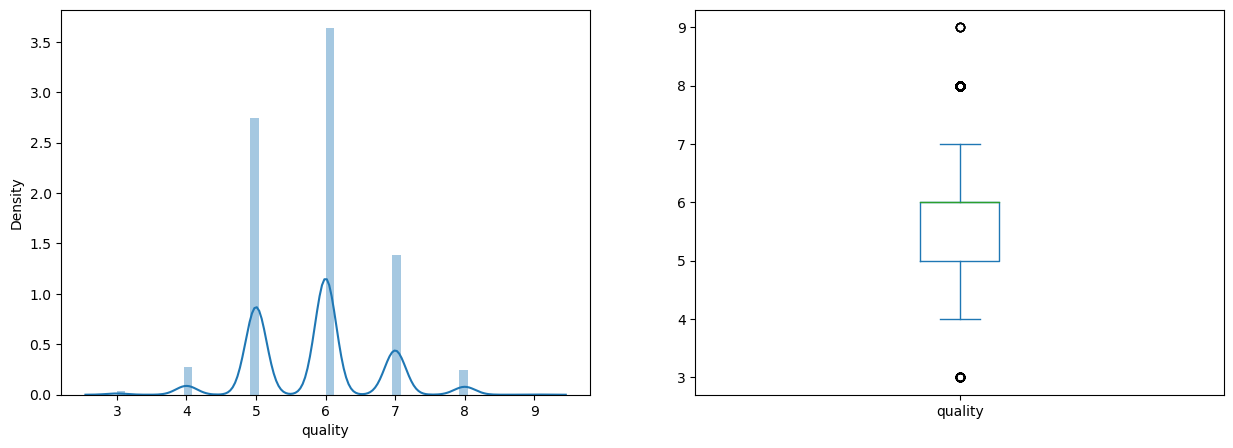

In [31]:
plt.figure(2)
plt.subplot(121)
sns.distplot(wine['quality'])
plt.subplot(122)
wine['quality'].plot.box(figsize=(15,5))

<Axes: xlabel='quality', ylabel='fixed acidity'>

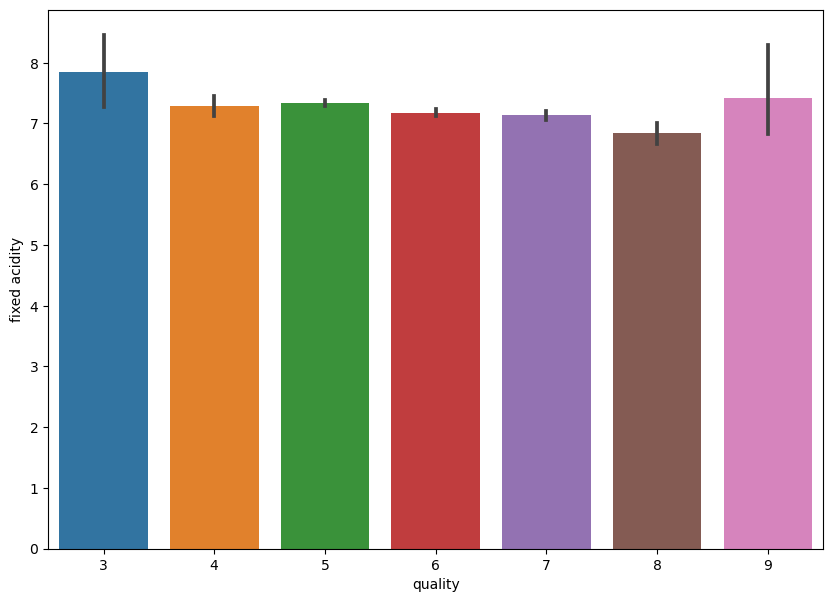

In [32]:
# Bivariate analysis to check quality with all the other variables to show how each variable is connected to quality.
plt.figure(figsize=(10,7))
sns.barplot(x='quality', y='fixed acidity', data=wine)

<Axes: xlabel='quality', ylabel='volatile acidity'>

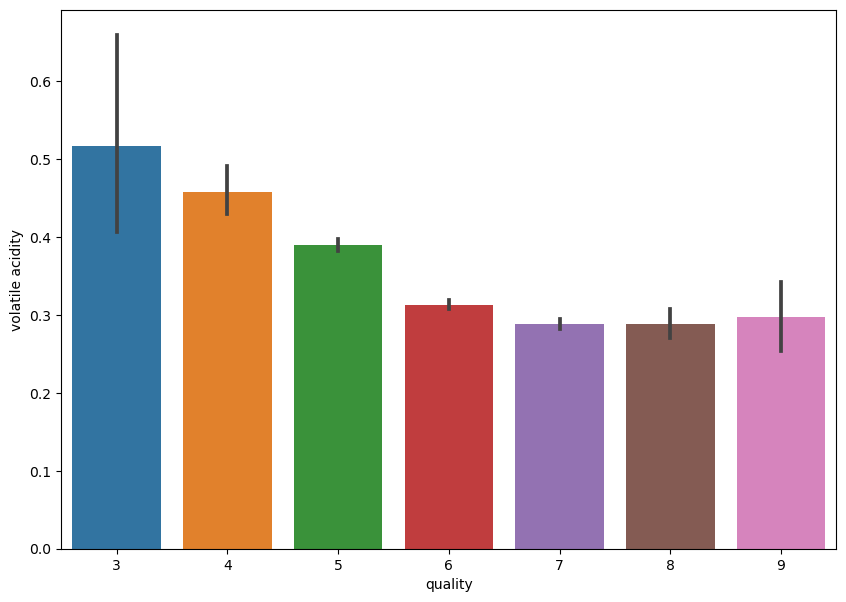

In [33]:
plt.figure(figsize=(10,7))
sns.barplot(x='quality', y='volatile acidity', data=wine)

<Axes: xlabel='quality', ylabel='citric acid'>

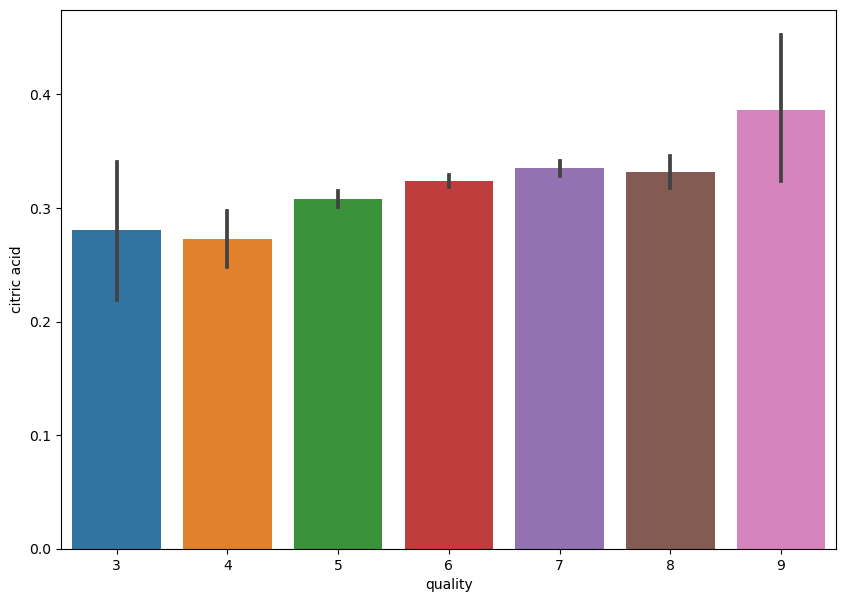

In [34]:
plt.figure(figsize=(10,7))
sns.barplot(x='quality', y='citric acid', data=wine)

<Axes: xlabel='quality', ylabel='residual sugar'>

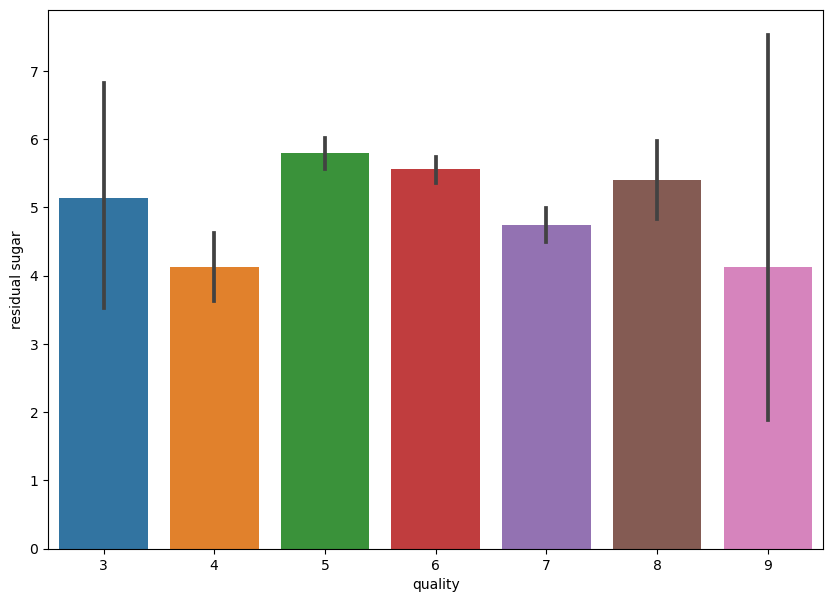

In [35]:
plt.figure(figsize=(10,7))
sns.barplot(x='quality', y='residual sugar', data=wine)

<Axes: xlabel='quality', ylabel='chlorides'>

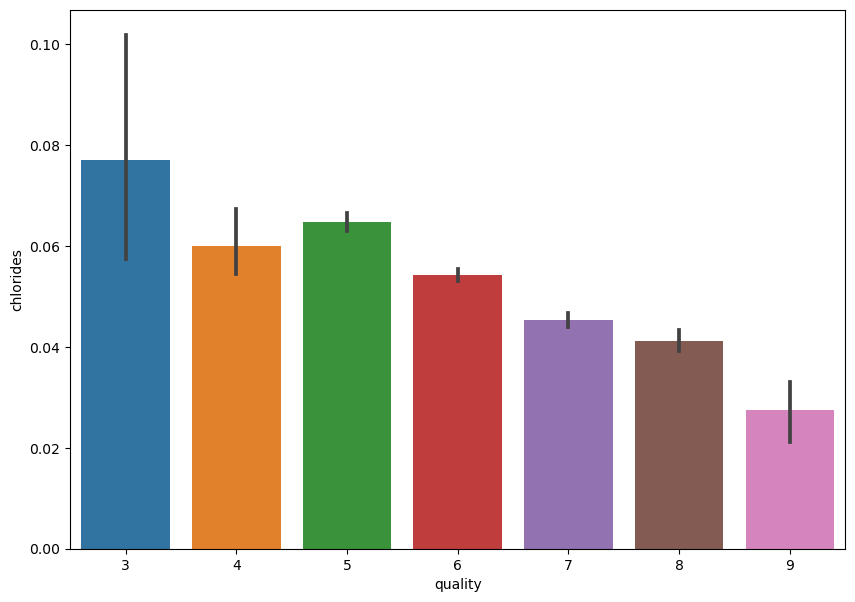

In [36]:
plt.figure(figsize=(10,7))
sns.barplot(x='quality', y='chlorides', data=wine)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

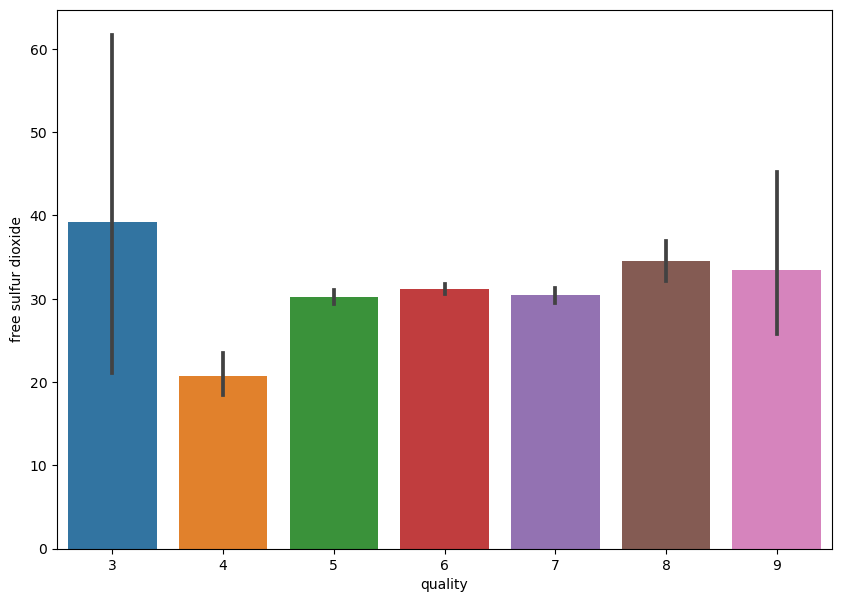

In [37]:
plt.figure(figsize=(10, 7))
sns.barplot(x='quality', y='free sulfur dioxide', data=wine)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

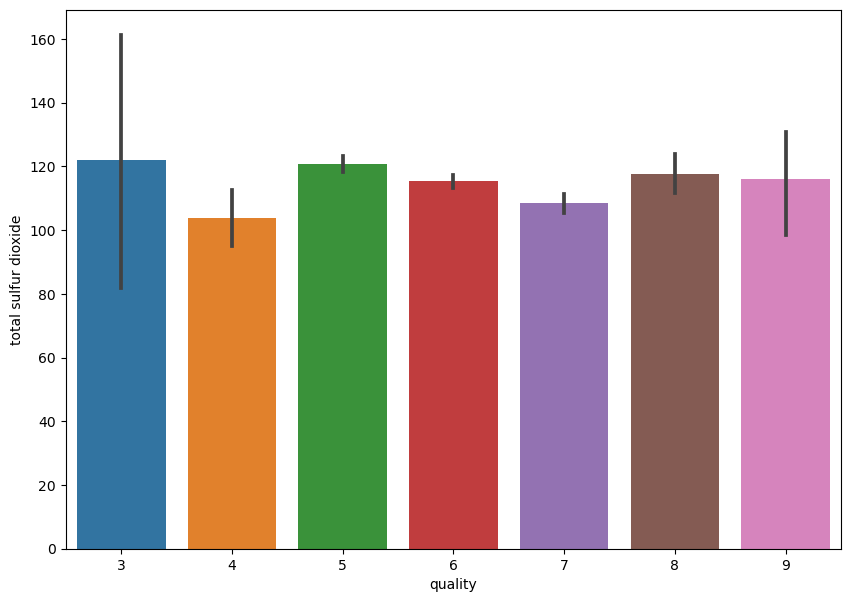

In [38]:
plt.figure(figsize=(10, 7))
sns.barplot(x='quality', y='total sulfur dioxide', data=wine)

<Axes: xlabel='quality', ylabel='density'>

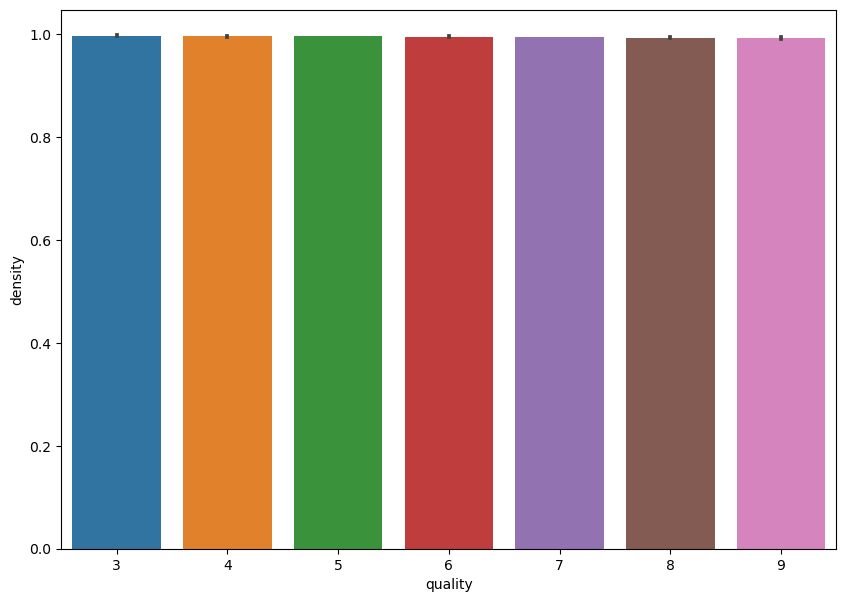

In [39]:
plt.figure(figsize=(10,7))
sns.barplot(x='quality', y='density', data=wine)

<Axes: xlabel='quality', ylabel='pH'>

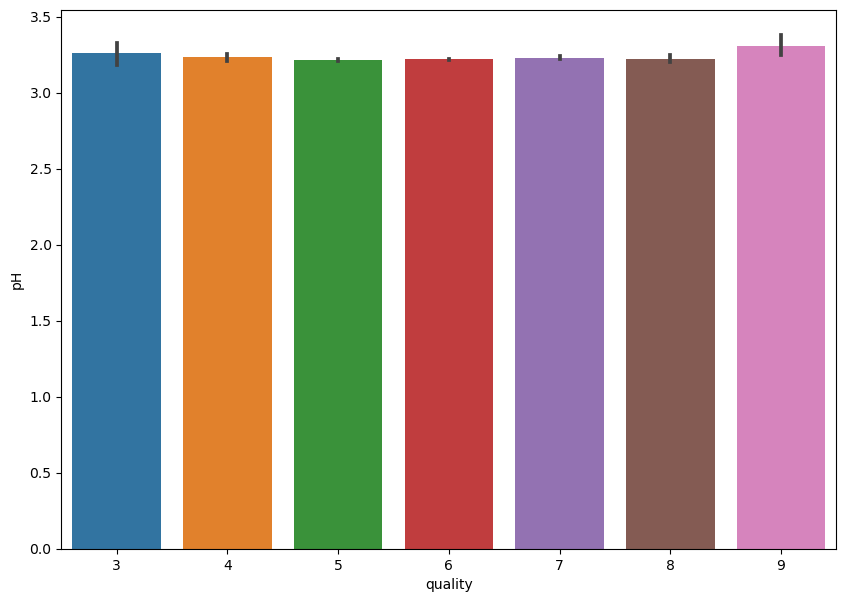

In [40]:
plt.figure(figsize=(10,7))
sns.barplot(x='quality', y='pH', data=wine)

<Axes: xlabel='quality', ylabel='sulphates'>

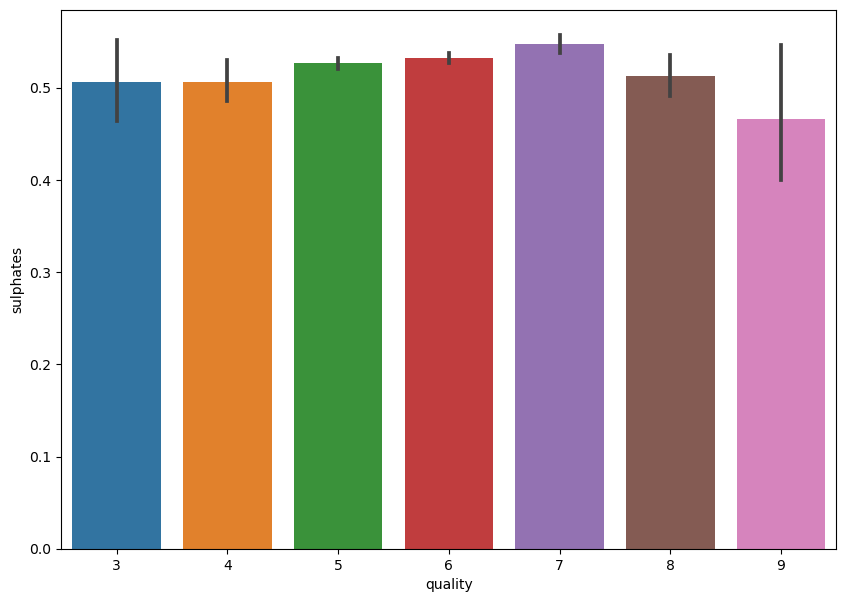

In [41]:
plt.figure(figsize=(10,7))
sns.barplot(x='quality', y='sulphates', data=wine)

<Axes: xlabel='quality', ylabel='alcohol'>

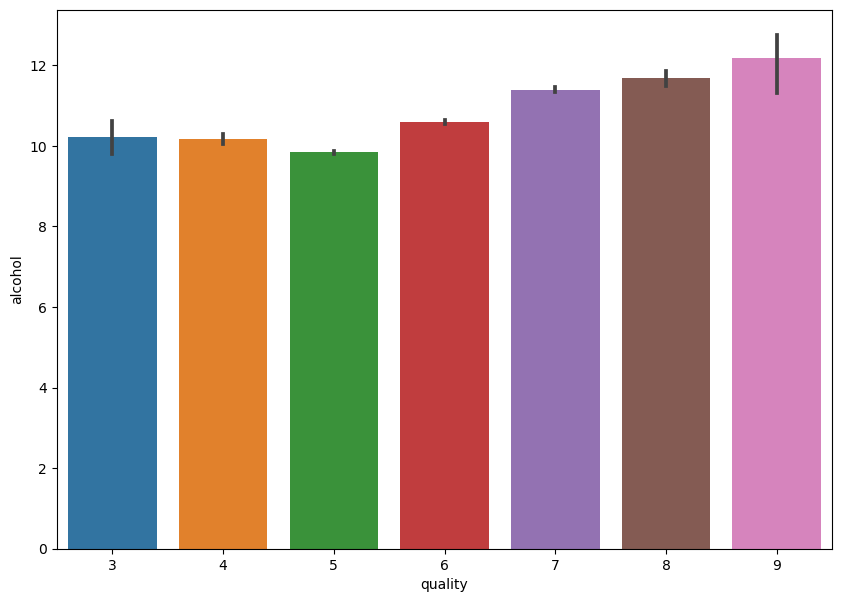

In [42]:
plt.figure(figsize=(10,7))
sns.barplot(x='quality', y='alcohol', data=wine)

<Axes: xlabel='quality', ylabel='quality'>

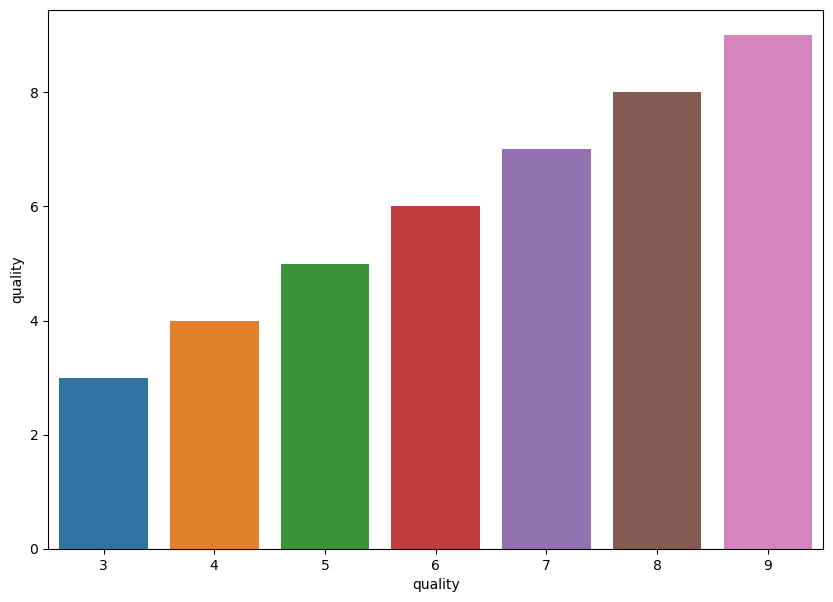

In [43]:
plt.figure(figsize=(10,7))
sns.barplot(x='quality', y='quality', data=wine)

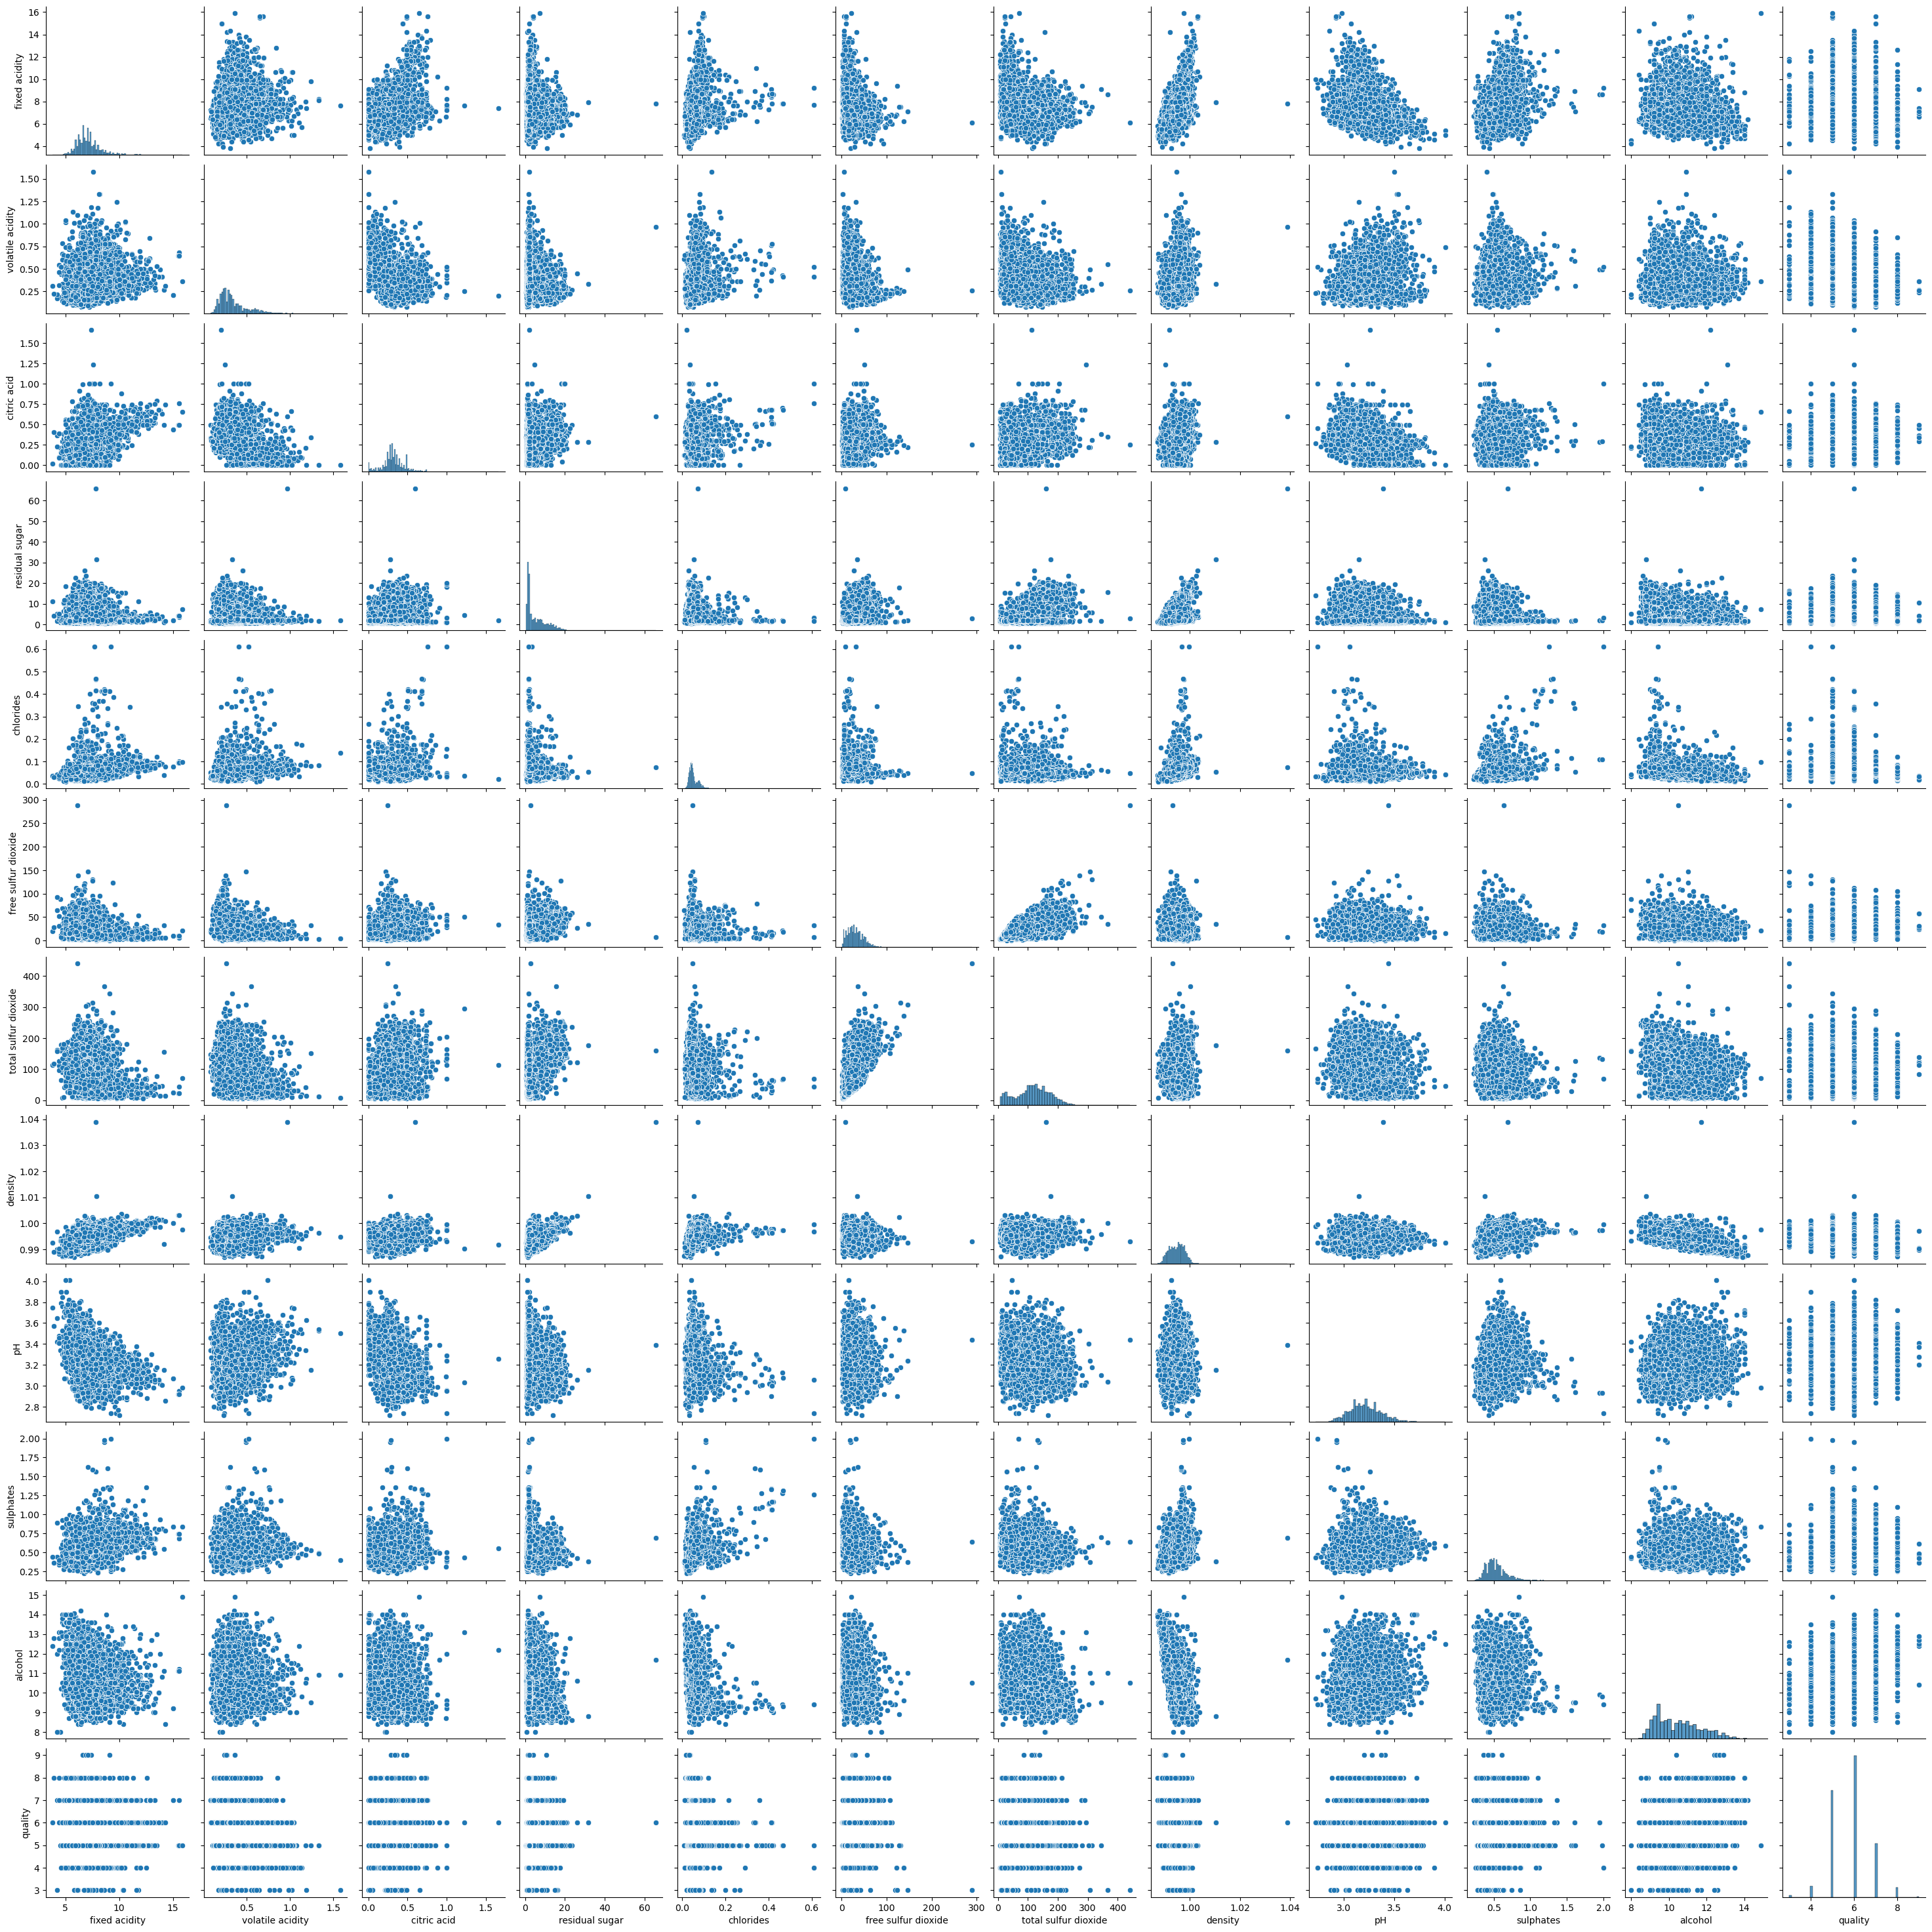

In [44]:
#Plotting all variables for their distribution and relation
sns.pairplot(wine)

In [45]:
# Convert 'type' column to numeric (0 for red, 1 for white)
wine['type'] = wine['type'].map({'red': 0, 'white': 1})

# Dropping non-numeric columns before calculating correlation
numeric_wine = wine.select_dtypes(include=[np.number])
correlation_matrix = numeric_wine.corr()
print(correlation_matrix)

#checking correlation
wine.corr()

                          type  fixed acidity  volatile acidity  citric acid  \
type                  1.000000      -0.488552         -0.653374     0.185892   
fixed acidity        -0.488552       1.000000          0.221066     0.323744   
volatile acidity     -0.653374       0.221066          1.000000    -0.377512   
citric acid           0.185892       0.323744         -0.377512     1.000000   
residual sugar        0.349358      -0.113442         -0.196677     0.142324   
chlorides            -0.512705       0.299104          0.377995     0.039412   
free sulfur dioxide   0.472653      -0.283485         -0.353402     0.132271   
total sulfur dioxide  0.700521      -0.330543         -0.414729     0.194398   
density              -0.391437       0.459713          0.272101     0.097068   
pH                   -0.328474      -0.251121          0.260134    -0.327860   
sulphates            -0.486715       0.301263          0.225656     0.059070   
alcohol               0.035095      -0.0

type  fixed acidity  volatile acidity  citric acid  \
type                  1.000000      -0.488552         -0.653374     0.185892   
fixed acidity        -0.488552       1.000000          0.221066     0.323744   
volatile acidity     -0.653374       0.221066          1.000000    -0.377512   
citric acid           0.185892       0.323744         -0.377512     1.000000   
residual sugar        0.349358      -0.113442         -0.196677     0.142324   
chlorides            -0.512705       0.299104          0.377995     0.039412   
free sulfur dioxide   0.472653      -0.283485         -0.353402     0.132271   
total sulfur dioxide  0.700521      -0.330543         -0.414729     0.194398   
density              -0.391437       0.459713          0.272101     0.097068   
pH                   -0.328474      -0.251121          0.260134    -0.327860   
sulphates            -0.486715       0.301263          0.225656     0.059070   
alcohol               0.035095      -0.096190         -0.039528    -0.010056   
quality               0.119185      -0.076174         -0.266677     0.084926   

                      residual sugar  chlorides  free sulfur dioxide  \
type                        0.349358  -0.512705             0.472653   
fixed acidity              -0.113442   0.299104            -0.283485   
volatile acidity           -0.196677   0.377995            -0.353402   
citric acid                 0.142324   0.039412             0.132271   
residual sugar              1.000000  -0.128814             0.403449   
chlorides                  -0.128814   1.000000            -0.195428   
free sulfur dioxide         0.403449  -0.195428             1.000000   
total sulfur dioxide        0.495684  -0.279602             0.721476   
density                     0.551494   0.363108             0.025113   
pH                         -0.266481   0.044653            -0.145164   
sulphates                  -0.185616   0.396240            -0.188947   
alcohol                    -0.359132  -0.257664            -0.179477   
quality                    -0.034654  -0.200553             0.054924   

                      total sulfur dioxide   density        pH  sulphates  \
type                              0.700521 -0.391437 -0.328474  -0.486715   
fixed acidity                    -0.330543  0.459713 -0.251121   0.301263   
volatile acidity                 -0.414729  0.272101  0.260134   0.225656   
citric acid                       0.194398  0.097068 -0.327860   0.059070   
residual sugar                    0.495684  0.551494 -0.266481  -0.185616   
chlorides                        -0.279602  0.363108  0.044653   0.396240   
free sulfur dioxide               0.721476  0.025113 -0.145164  -0.188947   
total sulfur dioxide              1.000000  0.031419 -0.237204  -0.275878   
density                           0.031419  1.000000  0.012525   0.260019   
pH                               -0.237204  0.012525  1.000000   0.190864   
sulphates                        -0.275878  0.260019  0.190864   1.000000   
alcohol                          -0.264385 -0.687432  0.120473  -0.004116   
quality                          -0.041598 -0.304447  0.018403   0.039054   

                       alcohol   quality  
type                  0.035095  0.119185  
fixed acidity        -0.096190 -0.076174  
volatile acidity     -0.039528 -0.266677  
citric acid          -0.010056  0.084926  
residual sugar       -0.359132 -0.034654  
chlorides            -0.257664 -0.200553  
free sulfur dioxide  -0.179477  0.054924  
total sulfur dioxide -0.264385 -0.041598  
density              -0.687432 -0.304447  
pH                    0.120473  0.018403  
sulphates            -0.004116  0.039054  
alcohol               1.000000  0.444637  
quality               0.444637  1.000000

<Axes: >

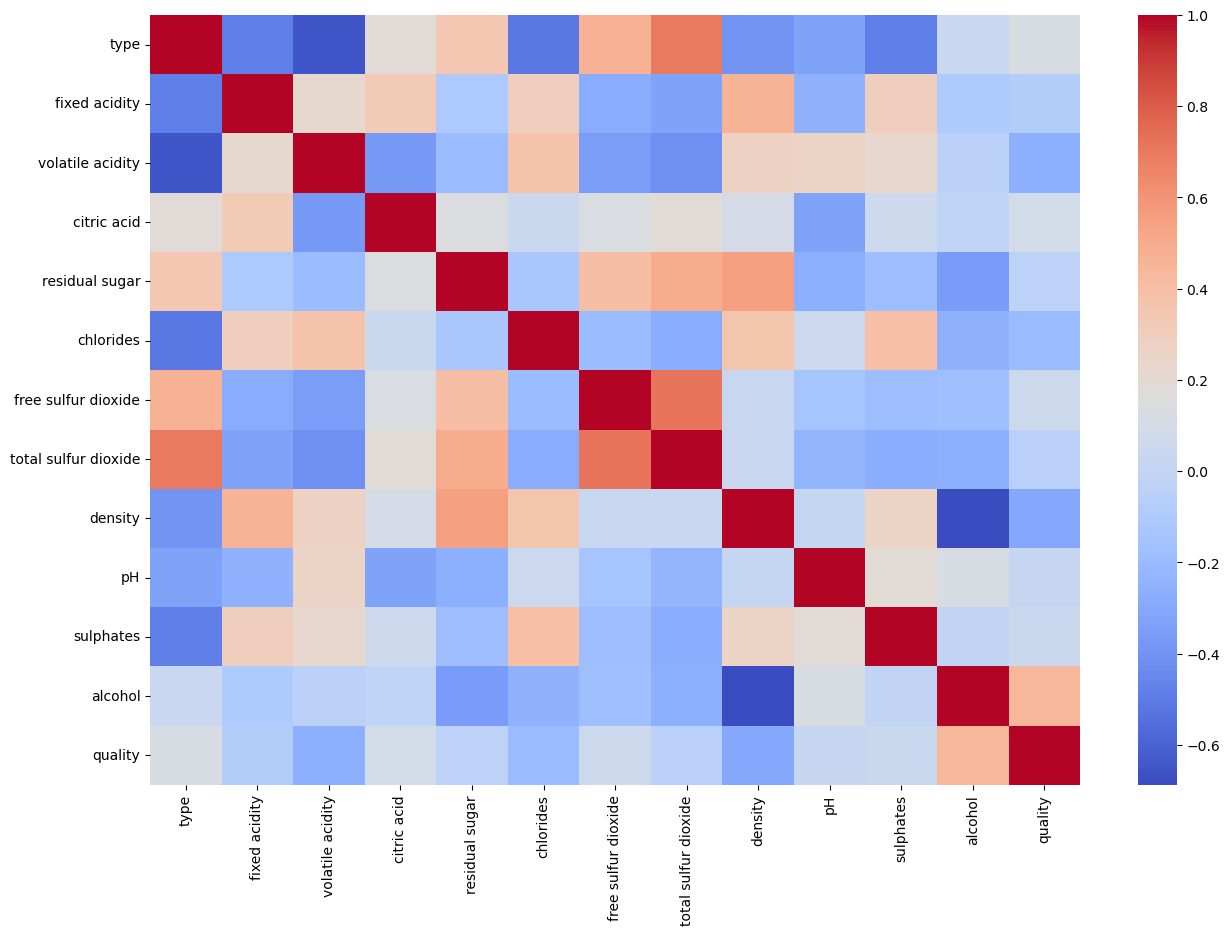

In [46]:
#buidling heatmap
plt.figure(figsize=(15,10))
sns.heatmap(wine.corr(), cmap='coolwarm')

In [47]:
# Dropping highly correlated variables - in this case total sulfur dioxide
wine_new = wine.drop('total sulfur dioxide', axis=1)

In [48]:
# Convert categorical value to dummies
# red wine = 0, white wine = 1 for type
wine_ml = pd.get_dummies(wine_new, drop_first=True)
wine_ml.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     1            7.0              0.27         0.36            20.7   
1     1            6.3              0.30         0.34             1.6   
2     1            8.1              0.28         0.40             6.9   
3     1            7.2              0.23         0.32             8.5   
4     1            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  density    pH  sulphates  alcohol  quality  
0      0.045                 45.0   1.0010  3.00       0.45      8.8        6  
1      0.049                 14.0   0.9940  3.30       0.49      9.5        6  
2      0.050                 30.0   0.9951  3.26       0.44     10.1        6  
3      0.058                 47.0   0.9956  3.19       0.40      9.9        6  
4      0.058                 47.0   0.9956  3.19       0.40      9.9        6

In [49]:
wine_ml.isnull().sum()

type                   0
fixed acidity          0
volatile acidity       0
citric acid            0
residual sugar         0
chlorides              0
free sulfur dioxide    0
density                0
pH                     0
sulphates              0
alcohol                0
quality                0
dtype: int64

In [50]:
Y = wine_ml['quality'].apply(lambda y: 1 if y > 7 else 0)
Y

0       0
1       0
2       0
3       0
4       0
       ..
6491    0
6492    0
6494    0
6495    0
6496    0
Name: quality, Length: 6463, dtype: int64

In [51]:
wine_ml.dropna(inplace=True)
X = wine_ml.drop('quality', axis=1)

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()
scaler.fit(X)
X_standard = scaler.transform(X)

In [54]:
X = X_standard

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.2,random_state=245)

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [59]:
y_pred = logreg.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [61]:
accuracy_score(Y_test, y_pred)

0.9706109822119103